In [1]:
import numpy as np
import pandas as pd
from copy import deepcopy
import time

import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d, Axes3D

import seaborn as sns
sns.set_style("whitegrid", {'axes.grid' : False})
sns.set_context('talk')
%matplotlib inline

from modules import IO

In [2]:
data_folder = 'data/'
output_folder = 'output/'

In [3]:
n_top = 1000

movies = IO(data_folder + 'top{}_all.pkl'.format(n_top)).read_pickle()
tmdb_genres_list = IO(data_folder + 'tmdb_genres_list.pkl').read_pickle()
imdb_genres_list = IO(data_folder + 'imdb_genres_list.pkl').read_pickle()

In [4]:
print(len(movies))
print(movies[0].keys())
movies[0]

1000
odict_keys(['tmdb_title', 'tmdb_genre_ids', 'tmdb_genres', 'tmdb_overview', 'tmdb_rating', 'tmdb_votes', 'imdb_title', 'imdb_genre_ids', 'imdb_genres', 'imdb_plot', 'imdb_synopsis', 'imdb_rating', 'imdb_votes'])


OrderedDict([('tmdb_title', 'Fifty Shades Freed'),
             ('tmdb_genre_ids', [6, 13]),
             ('tmdb_genres', ['Drama', 'Romance']),
             ('tmdb_overview',
              'Believing they have left behind shadowy figures from their past, newlyweds Christian and Ana fully embrace an inextricable connection and shared life of luxury. But just as she steps into her role as Mrs. Grey and he relaxes into an unfamiliar stability, new threats could jeopardize their happy ending before it even begins.'),
             ('tmdb_rating', 6.2),
             ('tmdb_votes', 1009),
             ('imdb_title', 'Fifty Shades Freed'),
             ('imdb_genre_ids', [0, 2, 13]),
             ('imdb_genres', ['Drama', 'Romance', 'Thriller']),
             ('imdb_plot',
              ['Believing they have left behind shadowy figures from their past, newlyweds Christian and Ana fully embrace an inextricable connection and shared life of luxury. But just as she steps into her role as Mrs. Gr

In [5]:
print(len(tmdb_genres_list))
print(tmdb_genres_list)
print(len(imdb_genres_list))
print(imdb_genres_list)

19
['Action', 'Adventure', 'Animation', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Family', 'Fantasy', 'History', 'Horror', 'Music', 'Mystery', 'Romance', 'Science Fiction', 'TV Movie', 'Thriller', 'War', 'Western']
20
['Drama', 'Crime', 'Romance', 'Animation', 'Mystery', 'Sci-Fi', 'Biography', 'Action', 'Western', 'Fantasy', 'Musical', 'Sport', 'Adventure', 'Thriller', 'Family', 'Music', 'War', 'Horror', 'History', 'Comedy']


In [6]:
tmdb_genres_count = np.zeros(len(tmdb_genres_list), dtype=int)
imdb_genres_count = np.zeros(len(imdb_genres_list), dtype=int)

for m in movies:
    for i in m['tmdb_genre_ids']:
        tmdb_genres_count[i] += 1
    for i in m['imdb_genre_ids']:
        imdb_genres_count[i] += 1

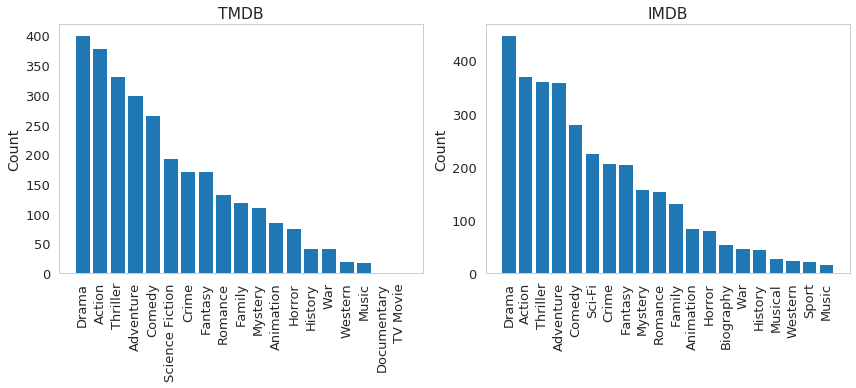

In [7]:
plt.figure(figsize=(12, 5.5))

plt.subplot(1, 2, 1)
plt.bar(range(len(tmdb_genres_count)), tmdb_genres_count[np.argsort(tmdb_genres_count)[::-1]]);
plt.xticks(range(len(tmdb_genres_count)), np.array(tmdb_genres_list)[np.argsort(tmdb_genres_count)[::-1]], \
           rotation=90);
plt.ylabel('Count');
plt.title('TMDB');

plt.subplot(1, 2, 2)
plt.bar(range(len(imdb_genres_count)), imdb_genres_count[np.argsort(imdb_genres_count)[::-1]]);
plt.xticks(range(len(imdb_genres_count)), np.array(imdb_genres_list)[np.argsort(imdb_genres_count)[::-1]], \
           rotation=90);
plt.ylabel('Count');
plt.title('IMDB');
plt.tight_layout();
plt.savefig(output_folder + 'eda01.png', bbox_inches='tight');

In [8]:
%%time

tmdb_all = IO(data_folder + 'tmdb_all.pkl').read_pickle()
print(len(tmdb_all))
print(tmdb_all[10])

tmdb_all_genres_count = np.zeros(len(tmdb_genres_list), dtype=int)
tmdb_overview_len = []

for m in tmdb_all:
    for i in m['genre_ids']:
        tmdb_all_genres_count[i] += 1
    tmdb_overview_len.append(len(m['overview'].split(' ')))
    
tmdb_overview_len = np.array(tmdb_overview_len)

361622
{'vote_count': 2, 'id': 32406, 'video': False, 'vote_average': 4.5, 'title': 'Leisurely Pedestrians, Open Topped Buses and Hansom Cabs with Trotting Horses', 'popularity': 1.077166, 'poster_path': '/tYDotjkxDeCeIqP2UpI9oTWt06W.jpg', 'original_language': 'xx', 'original_title': 'Leisurely Pedestrians, Open Topped Buses and Hansom Cabs with Trotting Horses', 'genre_ids': [5], 'backdrop_path': None, 'adult': False, 'overview': 'Alleged silent black-and-white short film shot at Apsley Gate, Hyde Park, London. It was claimed to be the first motion picture until pre-dating footage shot by Louis Le Prince was discovered. It was never publicly shown and is now considered a lost film with no known surviving prints or stills.', 'release_date': '1889-01-14'}
CPU times: user 2.91 s, sys: 859 ms, total: 3.77 s
Wall time: 3.83 s


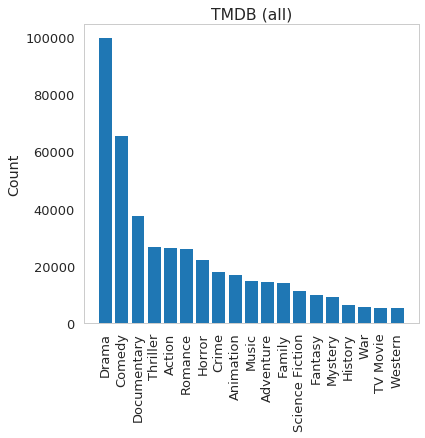

In [9]:
plt.figure(figsize=(6, 5.5))

plt.bar(range(len(tmdb_all_genres_count)), tmdb_all_genres_count[np.argsort(tmdb_all_genres_count)[::-1]]);
plt.xticks(range(len(tmdb_all_genres_count)), np.array(tmdb_genres_list)[np.argsort(tmdb_all_genres_count)[::-1]], \
           rotation=90);
plt.ylabel('Count');
plt.title('TMDB (all)');
plt.savefig(output_folder + 'eda02.png', bbox_inches='tight');

The number of movie overviews with no less than 20 words: 241617
The number of movie overviews with no less than 50 words: 131847
The number of movie overviews with no less than 100 words: 37328


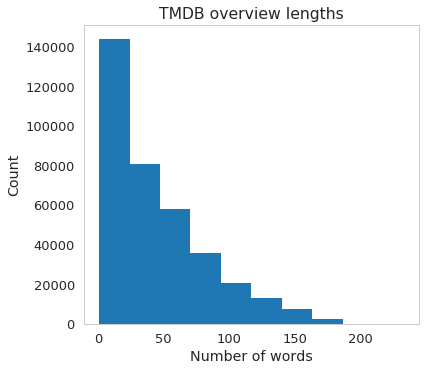

In [10]:
plt.figure(figsize=(6, 5.5))
plt.hist(tmdb_overview_len);
plt.xlabel('Number of words');
plt.ylabel('Count');
plt.title('TMDB overview lengths');
plt.savefig(output_folder + 'eda03.png', bbox_inches='tight');

print('The number of movie overviews with no less than 20 words: {}'.format(np.sum(tmdb_overview_len >= 20)))
print('The number of movie overviews with no less than 50 words: {}'.format(np.sum(tmdb_overview_len >= 50)))
print('The number of movie overviews with no less than 100 words: {}'.format(np.sum(tmdb_overview_len >= 100)))